In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', header = None, names = ['user_id', 'movie_id', 'rating', 'timestamp'], encoding = 'utf-8')
user = pd.read_csv('ml-100k/u.user', sep = '|', header = None, names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], encoding = 'utf-8')
movie = pd.read_csv('ml-100k/u.item', sep = '|', encoding="iso-8859-1", header = None, names = ["movie_id", "movie_title", "release_date", "video_releasedate", "IMDbURL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
ratings = ratings.drop(columns = ['timestamp'])
print(ratings.shape)
ratings.head()

(100000, 3)


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [3]:
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
movie.head()

,movie_id,movie_title,release_date,video_releasedate,IMDbURL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movie = movie.drop(columns = ["release_date", "video_releasedate", "IMDbURL"])
print(movie.shape)
movie.head()

(1682, 21)


,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
df = pd.merge(ratings,movie,on='movie_id')
df = df[['user_id', 'movie_id', 'rating', 'movie_title']]
print(df.shape)
df.tail(10)

(100000, 4)


,user_id,movie_id,rating,movie_title
99990,416,1594,5,Everest (1998)
99991,648,1626,1,Nobody Loves Me (Keiner liebt mich) (1994)
99992,655,1645,4,"Butcher Boy, The (1998)"
99993,747,1659,1,Getting Away With Murder (1996)
99994,916,1682,3,Scream of Stone (Schrei aus Stein) (1991)
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,Dadetown (1995)


In [111]:
#Kullanıcıların bir film için kullandıkları oya göre o filmin ortalama oyu
vote_average = df.groupby('movie_id')['rating'].mean()
vote_average.head(10)
vote_average

movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [108]:
#her film için kullanılan toplam oy sayısı
vote_count=df.groupby('movie_id')['rating'].count()
vote_count.head(10)
vote_count

movie_id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64

In [149]:
vote_average.to_csv("vote_average.csv")

C:\Users\Aybilge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [150]:
vote_count.to_csv("vote_count.csv")

C:\Users\Aybilge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [154]:
#düzenlenmiş yeni data
popdata=pd.read_excel("popdata.xlsx")

In [155]:
popdata

,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,genres_count,vote_count,vote_average
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,"['Animation', ""Children's"", 'Comedy']",3,452,3.878319
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,"['Action', 'Adventure', 'Thriller']",3,131,3.206107
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,['Thriller'],1,9,3.033333
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,"['Action', 'Comedy', 'Drama']",3,209,3.550239
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,"['Crime', 'Drama', 'Thriller']",3,86,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,['Drama'],1,1,1.000000
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,"['Romance', 'Thriller']",2,1,3.000000
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,"['Drama', 'Romance']",2,1,2.000000
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,['Comedy'],1,1,3.000000


In [119]:
#tüm filmlerin oy ortalaması
C = mov['vote_average'].mean()
print(C)

3.0760445083240144


In [120]:
#minimum oy sayısı
m = mov['vote_count'].quantile(0.90)
print(m)

153.0


In [156]:
popmov = mov.copy().loc[mov['vote_count'] >= m]
popmov.shape

(170, 25)

In [157]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average'] 
    return (v/(v+m) * R) + (m/(m+v) * C)
#Imdb formülüne göre popülarite hesaplama

In [158]:
popmov['score'] = popmov.apply(weighted_rating, axis=1)

In [160]:
#En popüler filmler listesi
popmov = popmov.sort_values('score', ascending=False)
popmov[['movie_title', 'vote_count', 'vote_average','genres', 'score']].head(10)

,movie_title,vote_count,vote_average,genres,score
49,Star Wars (1977),583,4.358491,"['Action', 'Adventure', 'Romance', 'Sci-Fi', '...",4.091895
317,Schindler's List (1993),298,4.466443,"['Drama', 'War']",3.994756
63,"Shawshank Redemption, The (1994)",283,4.445230,['Drama'],3.964759
126,"Godfather, The (1972)",413,4.283293,"['Action', 'Crime', 'Drama']",3.956952
482,Casablanca (1942),243,4.456790,"['Drama', 'Romance', 'War']",3.923320
11,"Usual Suspects, The (1995)",267,4.385768,"['Crime', 'Thriller']",3.908654
99,Fargo (1996),508,4.155512,"['Crime', 'Drama', 'Thriller']",3.905650
171,"Empire Strikes Back, The (1980)",367,4.204360,"['Action', 'Adventure', 'Drama', 'Romance', 'S...",3.872375
356,One Flew Over the Cuckoo's Nest (1975),264,4.291667,['Drama'],3.845647
602,Rear Window (1954),209,4.387560,"['Mystery', 'Thriller']",3.833245


In [161]:
#En çok oy kullanılan filmler
maxmov = popmov.sort_values('vote_count', ascending=False)
maxmov[['movie_title', 'vote_count']].head(10)

,movie_title,vote_count
49,Star Wars (1977),583
257,Contact (1997),509
99,Fargo (1996),508
180,Return of the Jedi (1983),507
293,Liar Liar (1997),485
285,"English Patient, The (1996)",481
287,Scream (1996),478
0,Toy Story (1995),452
299,Air Force One (1997),431
120,Independence Day (ID4) (1996),429


In [162]:
mov.head(2)

,movie_id,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,genres_count,vote_count,vote_average
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,"['Animation', ""Children's"", 'Comedy']",3,452,3.878319
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,"['Action', 'Adventure', 'Thriller']",3,131,3.206107


In [163]:
popgen = mov.drop(['movie_id', 'genres', 'genres_count', 'vote_count','unknown'], axis=1)
popgen.head(2)

,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,vote_average
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319
1,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107


Türlere göre film popülaritesi

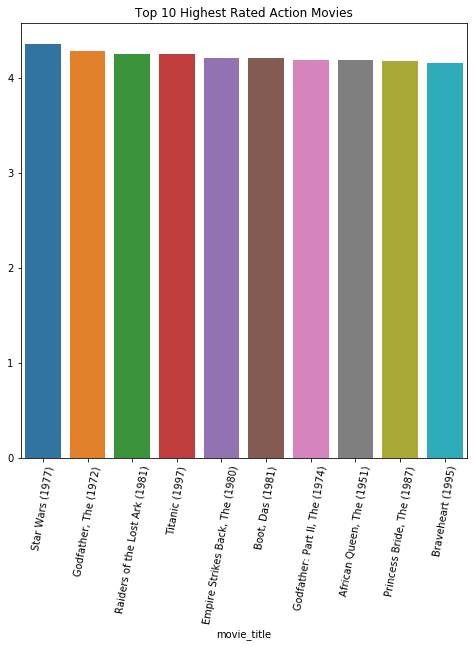

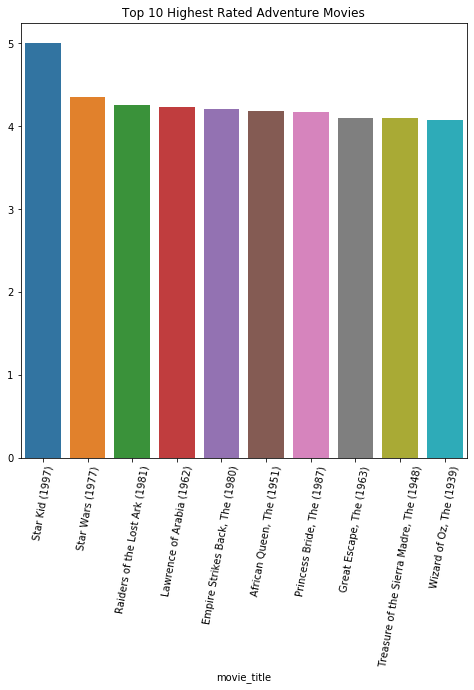

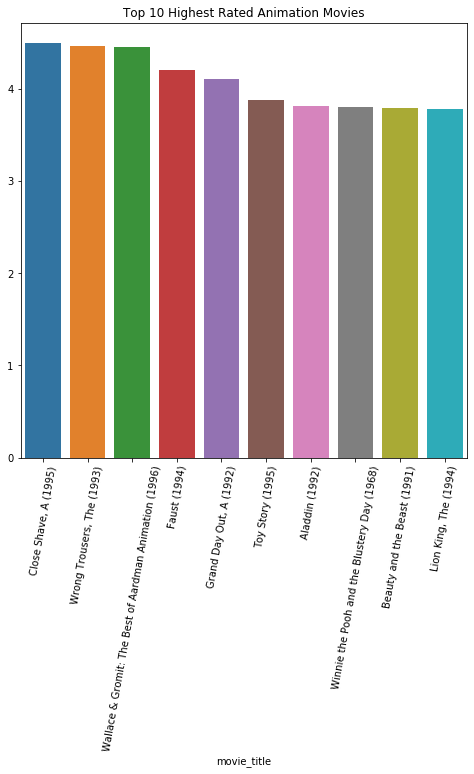

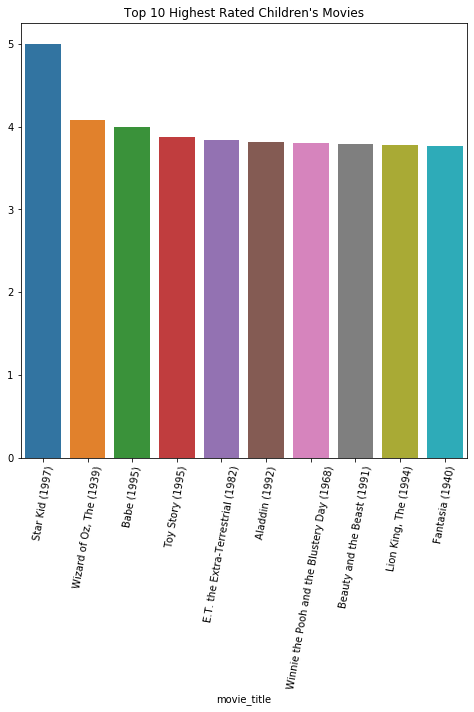

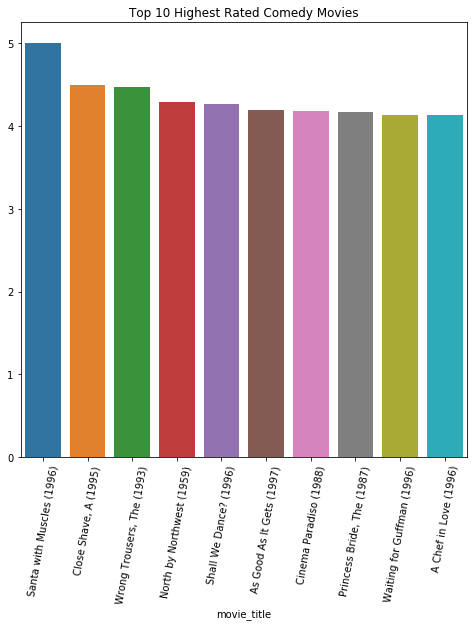

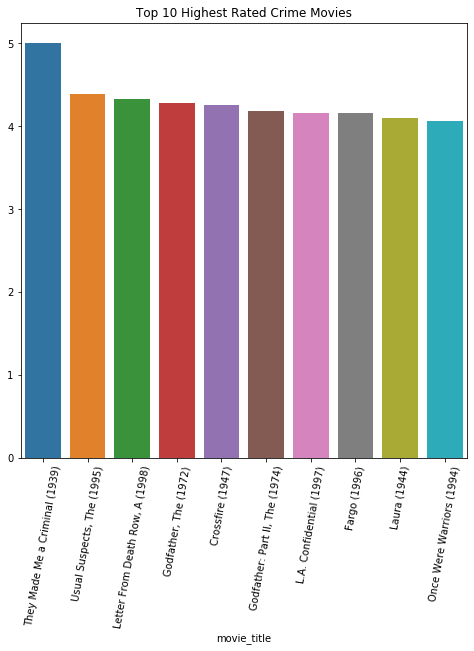

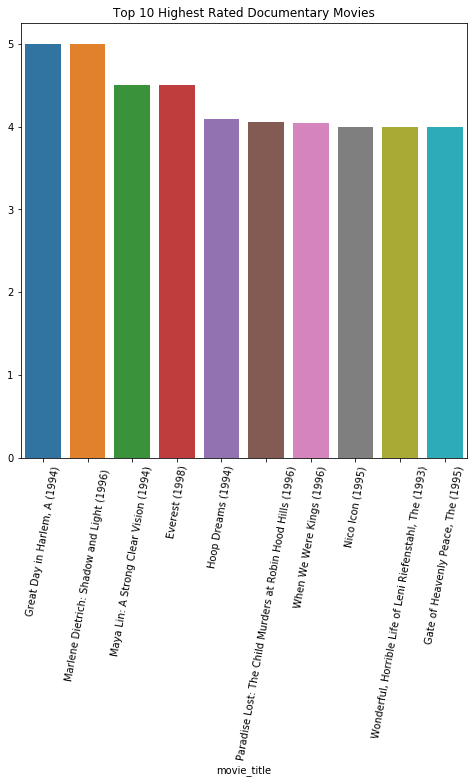

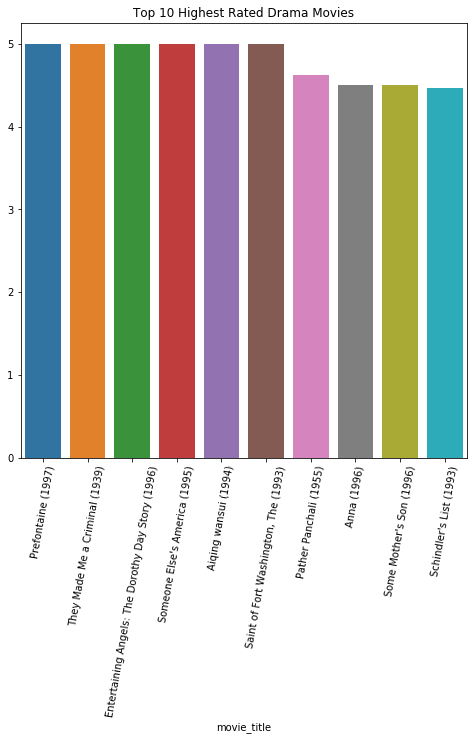

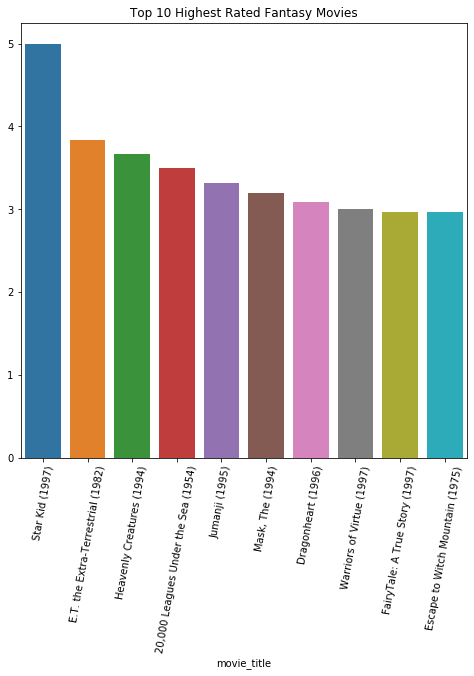

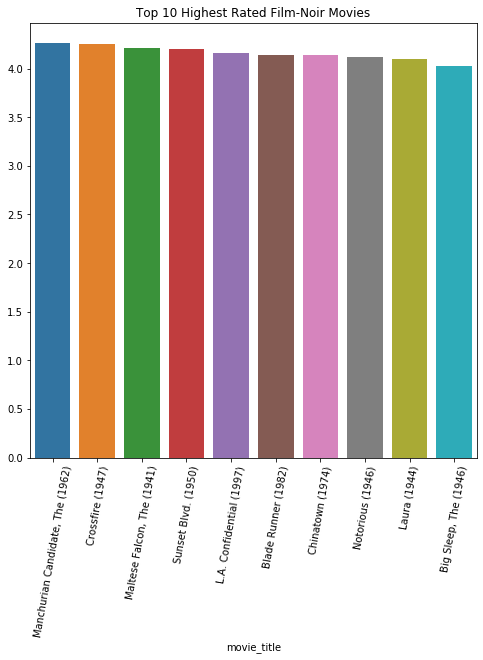

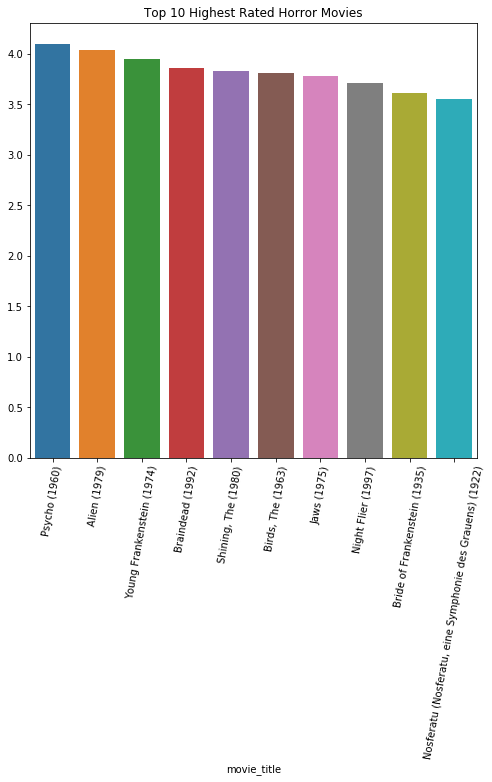

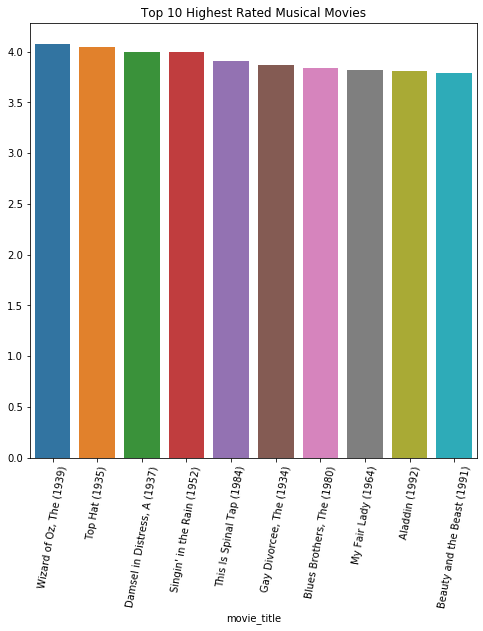

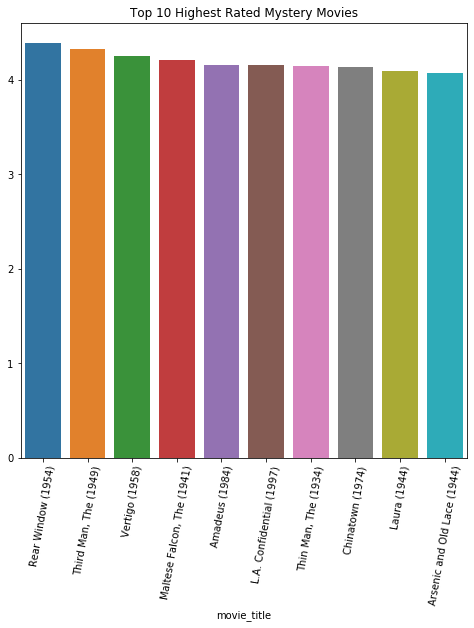

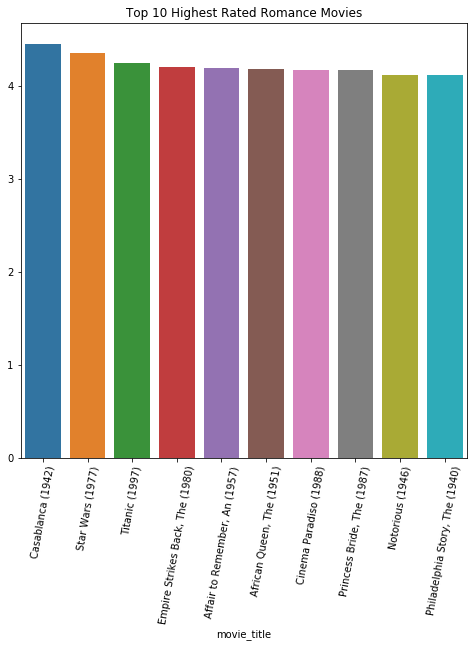

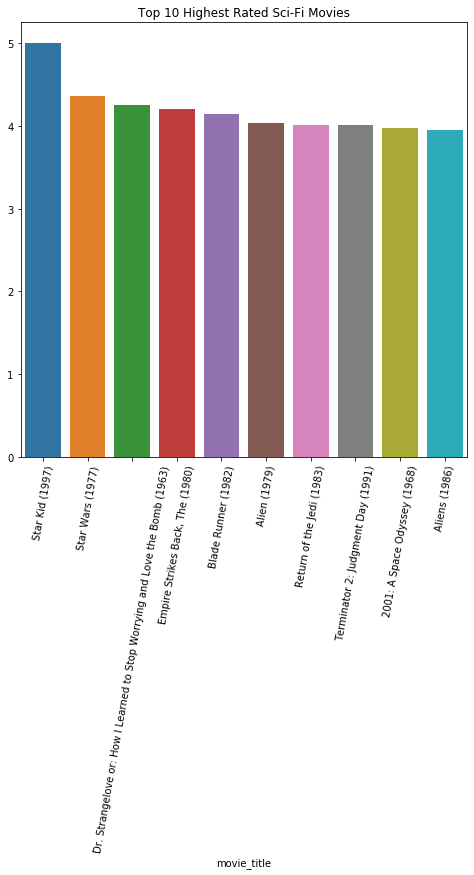

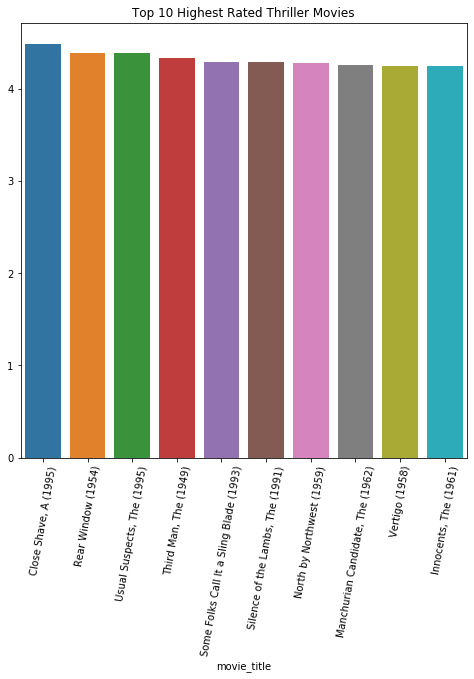

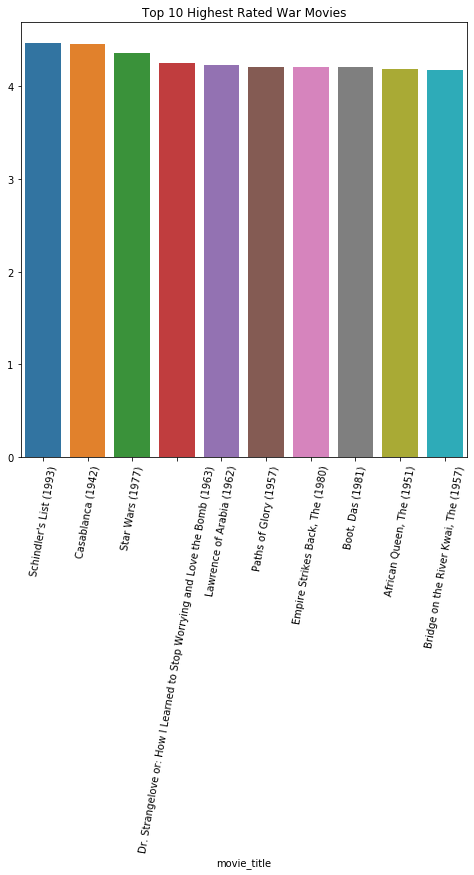

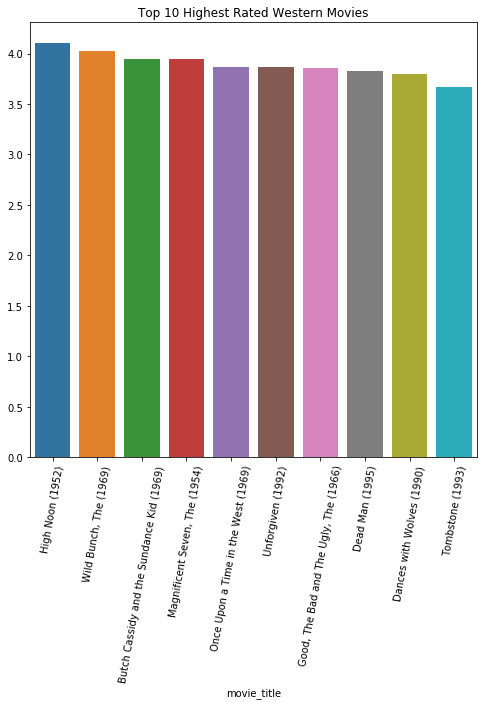

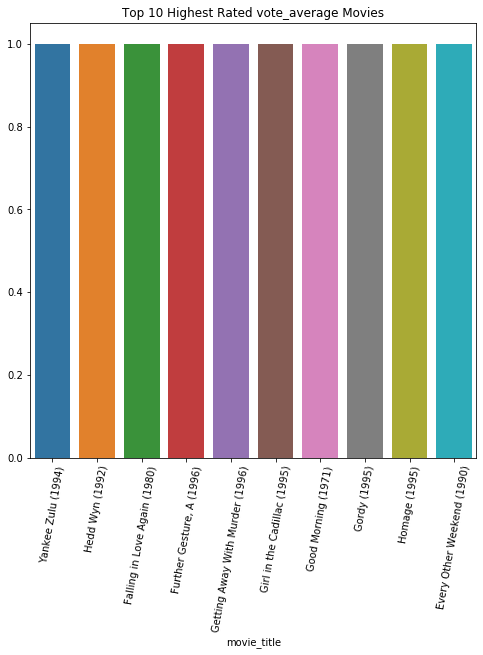

In [164]:
for gen in popgen.columns[1:20]:
    x = popgen[(popgen[gen]==1)]
    plt.figure(figsize=(8,8))
    topmovies = x.groupby('movie_title').mean()['vote_average'].sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 Highest Rated '+gen+' Movies')
    plt.xticks(rotation=80);